Task 2: Spam Detection using MultinomialNB 

● Load a text dataset (e.g., SMS Spam Collection or any public text 
dataset). 
● Preprocess using CountVectorizer or TfidfVectorizer. 
● Train a MultinomialNB classifier. 
● Evaluate: 
○ Accuracy 
○ Precision 
○ Recall 
○ Confusion Matrix 

In [1]:
%pip install nltk

import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def clean_text(msg):
    msg = msg.lower()
    msg = re.sub(r'[^a-z\s]', '', msg)
    tokens = msg.split()
    tokens = [ps.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df = pd.read_csv("spam.csv", encoding="latin-1")[['v1', 'v2']]
df.columns = ['label', 'message']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df['message'] = df['message'].apply(clean_text)

texts = df['message'].values
labels = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, random_state=1
)

tfidf = TfidfVectorizer()
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)

clf = MultinomialNB()
clf.fit(X_train_tf, y_train)

preds = clf.predict(X_test_tf)

print("Accuracy:", accuracy_score(y_test, preds))
print("Precision:", precision_score(y_test, preds))
print("Recall:", recall_score(y_test, preds))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, preds))
print("\nClassification Report:\n", classification_report(y_test, preds))


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.9739910313901345
Precision: 1.0
Recall: 0.7913669064748201

Confusion Matrix:
 [[976   0]
 [ 29 110]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       976
           1       1.00      0.79      0.88       139

    accuracy                           0.97      1115
   macro avg       0.99      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



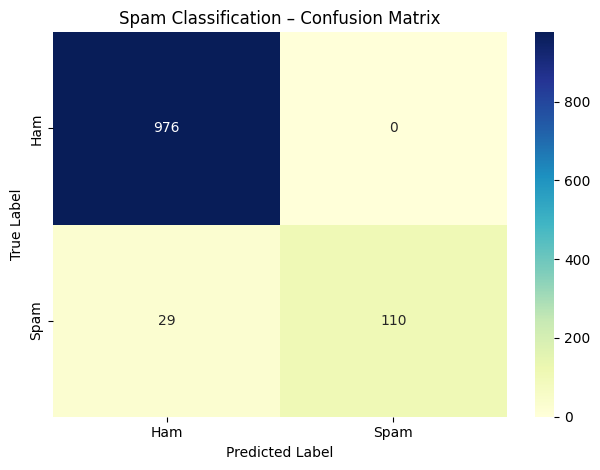

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = ['Ham', 'Spam']
sns.heatmap(confusion_matrix(y_test, preds), annot=True, cmap='YlGnBu', fmt='d',
            xticklabels=labels, yticklabels=labels)
plt.title('Spam Classification – Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()
